Machine Learning and Artificial Intelligence have great use in medical science. Some of the project focuses on predicting the future diagnoses of the cancer in the patients. One such dataset is Haberman dataset. Heberman's Dataset is the data collected from the study in University of Chicago Billing Hospital between year 1958 to 1970.

The following repo gives us an insights for haberman dataset. It starts with observing the data, then doing some plotting and finally leading to predictive modelling.

This repo will answer some of the questions such as:
1. What is the node number with higest count?
2. What is the age of the people who took the test of cancer?
3. What is the age of the person who had highest number of nodes?
4. Which year have the lowest number of patients have survived for more than 5 years?
5. What is the approx value of interquantile range for Status - 2?

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Lets now first get the location of the csv file and read the dataframe.

In [2]:
file_location=os.path.join(os.path.dirname(os.path.abspath("__file__")),r"haberman.csv")
df=pd.read_csv(file_location)

# Data observation

Now lets get how many data points and features. You can also get that with shape of the dataset

In [3]:
df.shape

(306, 4)

df.info() prints out the information about the columns in the dataframe. Its prints in <colimn_name, count (if any values are null), and dtype of the column>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     306 non-null    int64
 1   Year    306 non-null    int64
 2   Nodes   306 non-null    int64
 3   Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.head()

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Print out all the columns of the dataset

In [6]:
columns=df.columns
columns

Index(['Age', 'Year', 'Nodes', 'Status'], dtype='object')

Checking if there are any null or nan values

In [7]:
df.isnull().sum()

Age       0
Year      0
Nodes     0
Status    0
dtype: int64

Check for the count of nodes are in df

In [8]:
df["Nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
11      4
14      4
19      3
23      3
22      3
15      3
10      3
20      2
12      2
17      1
18      1
16      1
21      1
24      1
25      1
28      1
30      1
35      1
46      1
52      1
Name: Nodes, dtype: int64

Q1: What is the node number with higest count?

Answer: 136

# Now lets do some Ploting

Lets do the pair-ploting. This gives us pairwise relation of each column with other

Text(0.5, 1.01, 'Pair Plots')

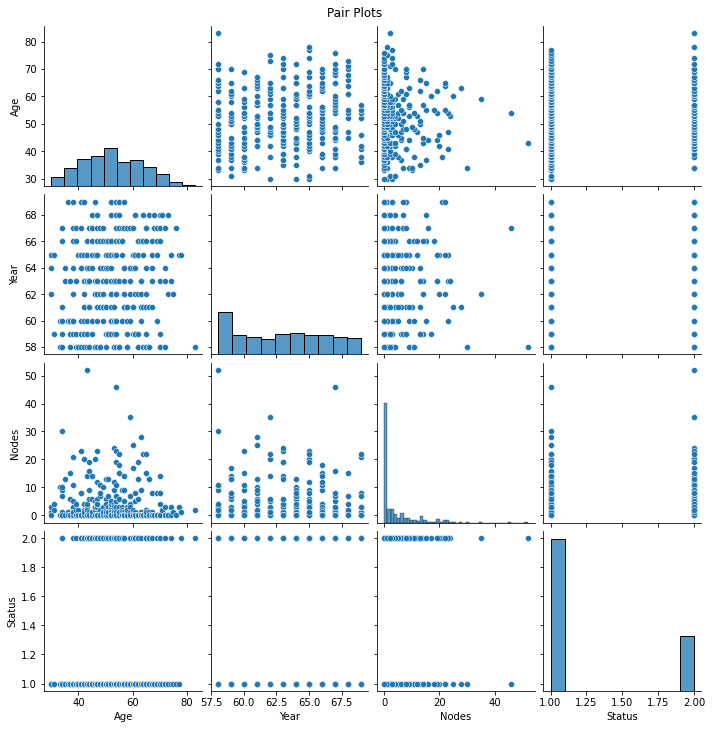

In [9]:
g=sns.pairplot(df)
g.fig.suptitle("Pair Plots", y=1.01) # y= some height>1

Lets plot probability distribution of "Age" now. This gives us the probability density function of feature

Text(0.5, 1.0, 'Density Distribition Graph for Age')

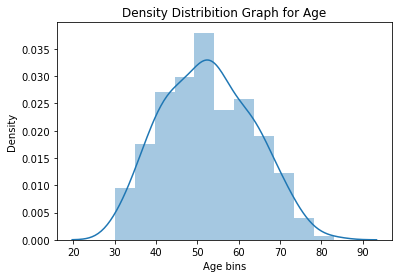

In [10]:
sns.distplot(df["Age"],axlabel="Age bins").set_title("Density Distribition Graph for Age")

Q2: What is the age of the people who took the test of cancer?

Ans: Looking at the above plots, we can say that the range of the age is 50-55, where people took the diagonis test.

Lets plot cumulative distribution. A cumulative distribution represents the proportion or count of observations falling below each unique value in a dataset.

Text(0.5, 1.0, 'Cumulative Distribition Graph')

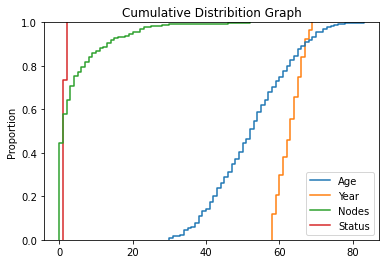

In [11]:
sns.ecdfplot(df).set_title("Cumulative Distribition Graph")

Getting the scatter plot for age vs how may nodes

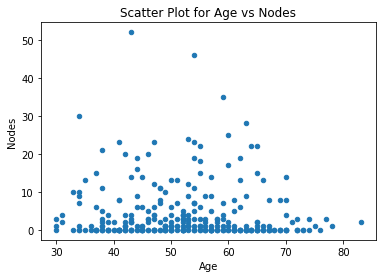

In [12]:
df.plot(kind='scatter', x='Age', y='Nodes').set_title("Scatter Plot for Age vs Nodes")
plt.show()

Q3: What is the age of the person who had highest number of nodes?

Ans: 45

Boxplots show distributions with respect to categories. It mentions the outliers in the dataset. We have to be careful with the outliers. It might a datapoint also, just it is in our case.

Text(0.5, 1.0, 'Box Plot for Year vs Nodes')

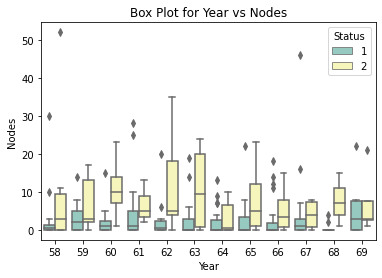

In [13]:
sns.boxplot(x="Year", y="Nodes", hue="Status", data=df, palette="Set3").set_title("Box Plot for Year vs Nodes")

Q4: Which year have the lowest number of patients have survived for more than 5 years?

Ans: 68

Violin Plot used are the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.

Text(0.5, 1.0, 'Voilin Plot for Status vs Nodes')

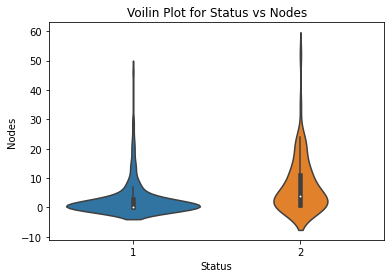

In [14]:
sns.violinplot(x="Status", y="Nodes", data=df, size=8).set_title("Voilin Plot for Status vs Nodes")

Q5: What is the approx value of interquantile range for Status - 2?

Ans: 0 - 10

# Predictive Modeling

In [15]:
#get numpy array
data=df.values
#split data into input features 'X' and output 'Y'
X, Y = data[:, :-1], data[:, -1]

In [24]:
#split data into train and test format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (214, 3)
y_train: (214,)
X_test: (92, 3)
y_test: (92,)


Lets do the data modeling.

In [25]:
def predict_data(model,temp_df):
    '''
    Description:
    Prediction from the model
    
    INPUT:
    model: model from which predictions needs to be done
    temp_df: data from which predictions needs to be done
    
    OUTPUT:
    preds: predicted data
    '''
    preds=model.predict(temp_df)
    return preds

def scores(actual, predicted):
    '''
    Description:
    Prediction from the model
    
    INPUT:
    actual: actual data
    predicted: predicted data
    
    OUTPUT:
    scores_: r2 scores
    '''
    scores_=r2_score(actual, predicted)
    return scores_

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lm_model = LinearRegression(normalize=True) 

lm_model.fit(X_train, y_train) 

#Predict using your model
y_test_preds = predict_data(lm_model,X_test)
#lm_model.predict(X_test)
y_train_preds = predict_data(lm_model,X_train)
#lm_model.predict(X_train)

#Score using your model
test_score = scores(y_test, y_test_preds)
train_score = scores(y_train, y_train_preds)

# Model Evaluation

In [27]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.07179011907094457.  The rsquared on the test data was 0.058962593329193624.


You can see that both the values are pretty less. This is because of underfitting. With the increase in data, these r2_score will also increase.